In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# データの可視化

In [3]:
y, sr = librosa.load("./dataset/sample.wav", sr=44100)

# クロマグラム

In [14]:
# 調波成分を抽出してクロマグラムを算出する
y_harmonic, y_percussive = librosa.effects.hpss(y)
C = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)

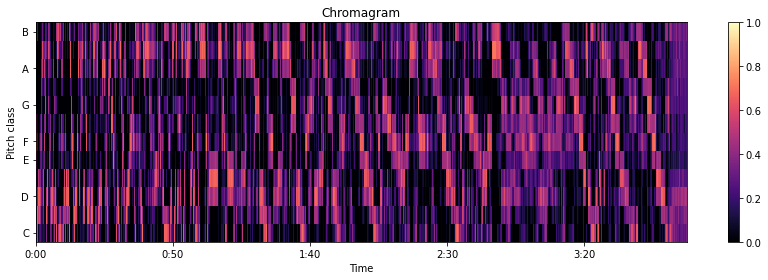

In [15]:
plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

# スペクトログラム

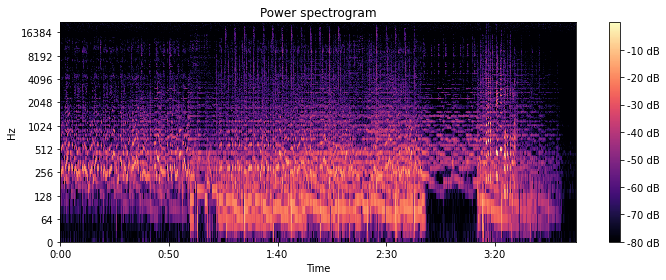

In [13]:
D = np.abs(librosa.stft(y))
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# スペクトログラムとRMSエネルギー

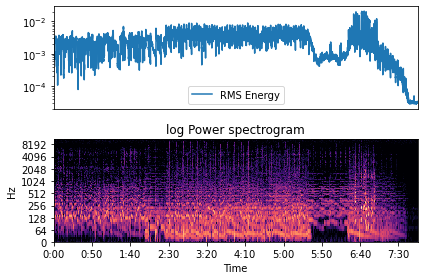

In [17]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()